# Dorothea

There are two ways of describing the city of Dorothea: you can say that four aluminum towers rise from its walls flanking seven gates with spring-operated drawbridges that span the moat whose water feeds four green canals which cross the city, dividing it into nine quarters, each with three hundred houses and seven hundred chimneys. And bearing in mind that the nubile girls of each quarter marry youths of other quarters and their parents exchange the goods that each family holds in monopoly -- bergamot, sturgeon roe, astrolabes, amethysts -- you can then work from these facts until you learn everything you wish about the city in the past, present, and future. Or else you can say, like the camel driver who took me there: “I arrived here in my first youth, one morning, many people were hurrying along the streets toward the market, the women had fine teeth and looked you straight in the eye, three soldiers on a platform played the trumpet, and all around wheels turned and colored banners fluttered in the wind. Before then I had known only the desert and the caravan routes. In the years that followed, my eyes returned to contemplate the desert expanses and the caravan routes; but now I know this path is only one of the many that opened before me on that morning in Dorothea.”

In [1]:
from __future__ import print_function

In [2]:
from IPython.display import Image

In [3]:
%matplotlib inline

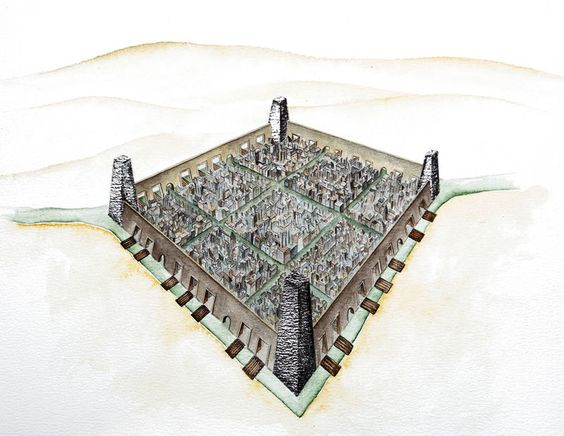

In [4]:
Image(filename='../Images/Dorothea.jpg') 

## DOROTEA

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np

In [6]:
from PlotUtil import *
from Util import *
from PandaUtil import *

In [7]:
import FEParam as FP

In [33]:
from scipy import signal as SGN

In [8]:
import logging
import sys

# Get root logger (all other loggers will be derived from this logger's
# properties)
logger = logging.getLogger()
logger.handlers[0].stream = sys.stdout

In [9]:

logger.warning("I will output to terminal")  # No output in notebook, goes to terminal

### Nominal calibration constant (adc_per_pes)

http://localhost:8989/notebooks/SIERPE.ipynb

In [10]:
adc_to_pes = 18.07  # in the MC this is fixed for all PMTs, in data it comes from calibration

In [11]:
ls -lh '../../data/Waveforms/25ns/WF_Na_1k.h5'

-rw-r--r--  1 jjgomezcadenas  staff   508M Aug 28 20:31 ../../data/Waveforms/25ns/WF_Na_1k.h5


In [126]:
h5f = tb.open_file('../../data/Waveforms/25ns/WF_Na_test_RWF.h5', "r+")

In [127]:
 pmt_t = h5f.root.Sensors.DataPMT

In [128]:
PMT = read_data_sensors(pmt_t)

In [129]:
PMT

,active,adc_to_pes,channel,gain,x,y
0,1,20.0,0,4500000.0,23.9414,65.7785
1,1,20.0,1,4500000.0,-68.9365,-12.1554
2,1,20.0,2,4500000.0,44.9951,-53.6231
3,1,20.0,3,4500000.0,0.0000,185.0000
4,1,20.0,5,4500000.0,-118.9160,141.7180
5,1,20.0,6,4500000.0,-182.1890,32.1249
6,1,20.0,8,4500000.0,-160.2150,-92.5000
7,1,20.0,9,4500000.0,-63.2737,-173.8430
8,1,20.0,10,4500000.0,63.2737,-173.8430
9,1,20.0,12,4500000.0,160.2150,-92.5000


In [130]:
PMT['adc_to_pes'] = adc_to_pes

In [131]:
PMT

,active,adc_to_pes,channel,gain,x,y
0,1,18.07,0,4500000.0,23.9414,65.7785
1,1,18.07,1,4500000.0,-68.9365,-12.1554
2,1,18.07,2,4500000.0,44.9951,-53.6231
3,1,18.07,3,4500000.0,0.0000,185.0000
4,1,18.07,5,4500000.0,-118.9160,141.7180
5,1,18.07,6,4500000.0,-182.1890,32.1249
6,1,18.07,8,4500000.0,-160.2150,-92.5000
7,1,18.07,9,4500000.0,-63.2737,-173.8430
8,1,18.07,10,4500000.0,63.2737,-173.8430
9,1,18.07,12,4500000.0,160.2150,-92.5000


In [132]:
len(PMT)

12

##### NB The value of adc_to_pes in changed in the temporary DF, not in file

In [133]:
pmtcwf = h5f.root.RD.pmtcwf

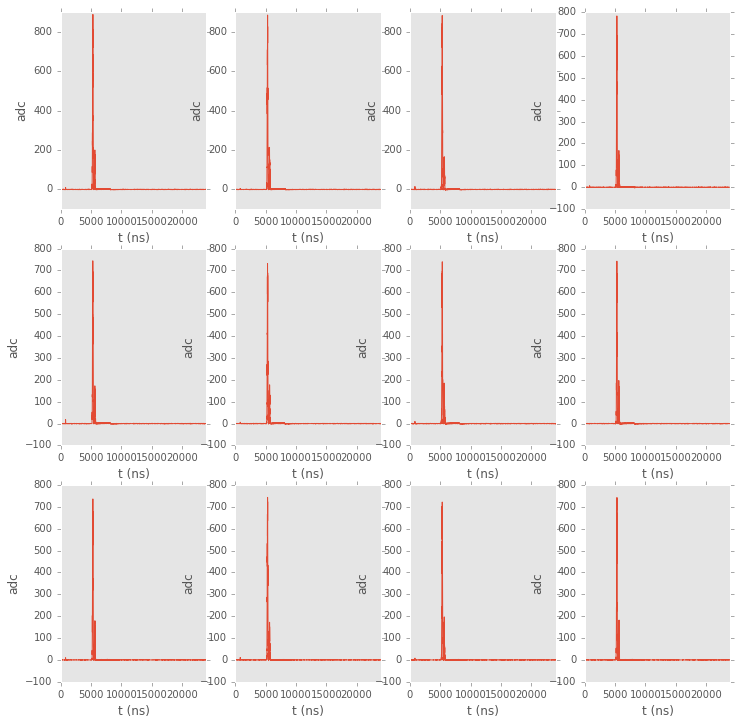

Press a key...


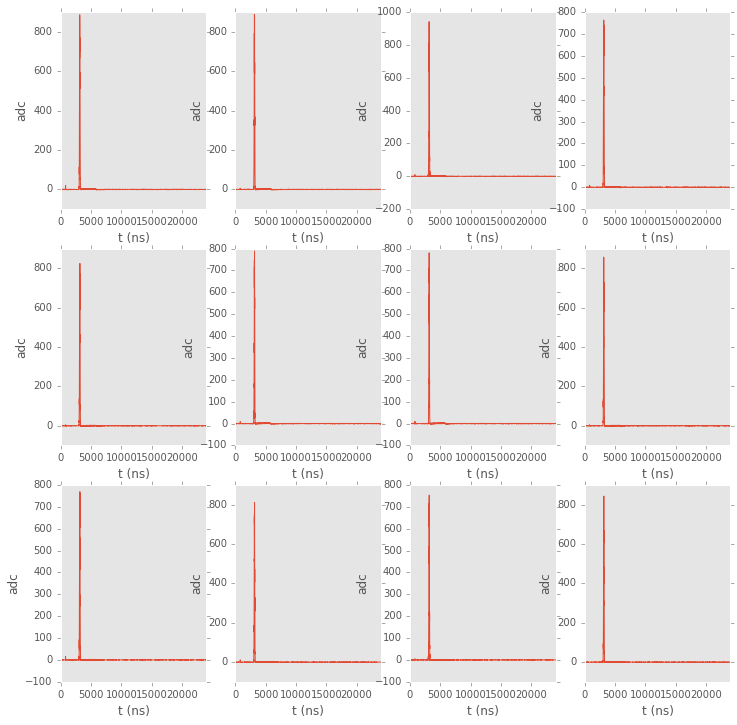

Press a key...


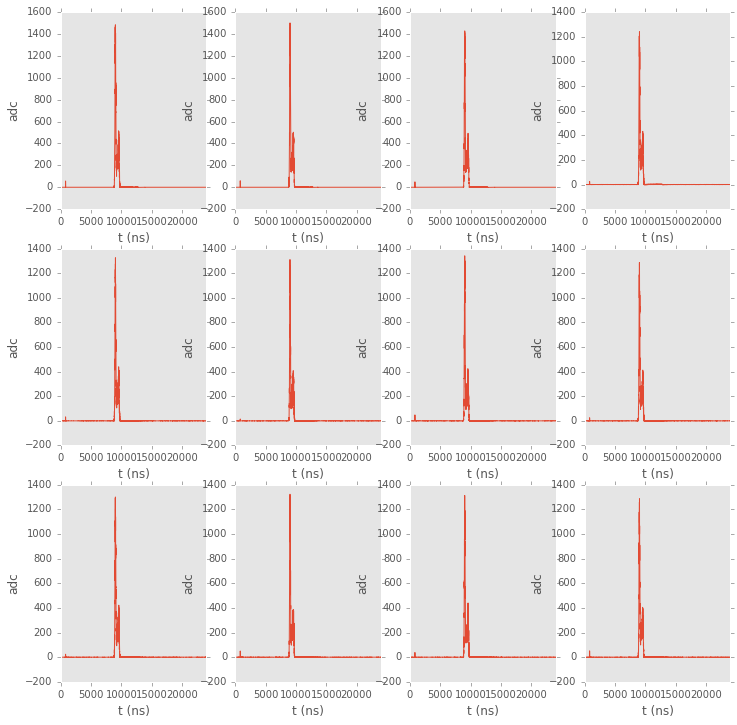

Press a key...


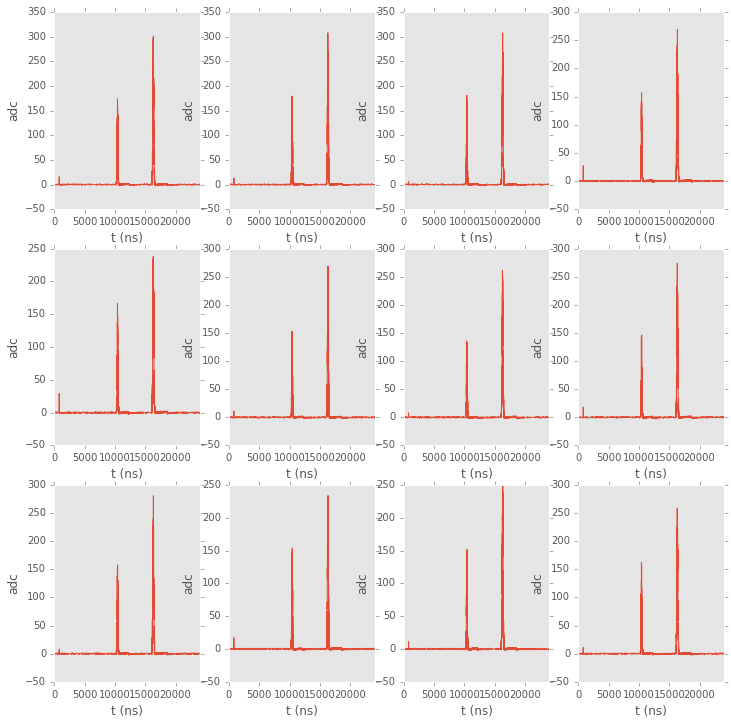

Press a key...


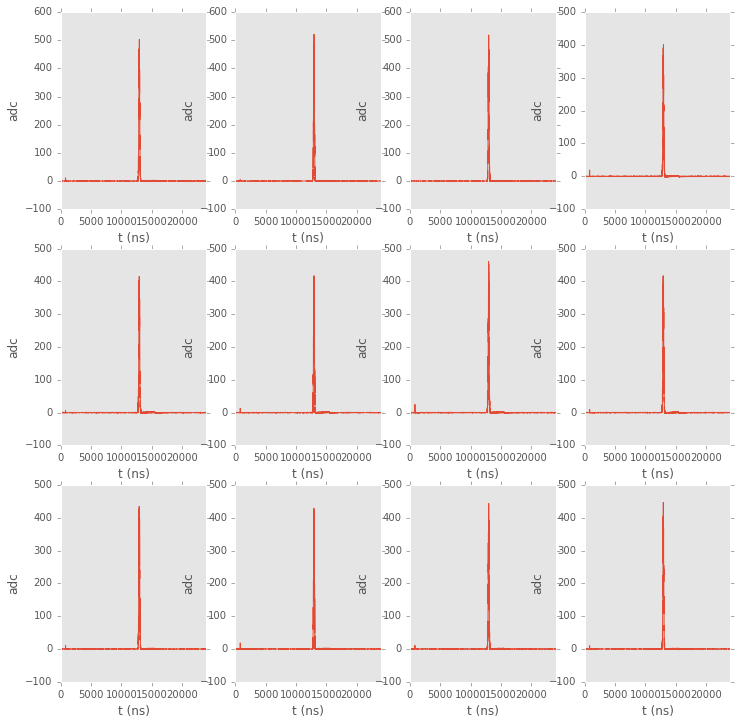

Press a key...


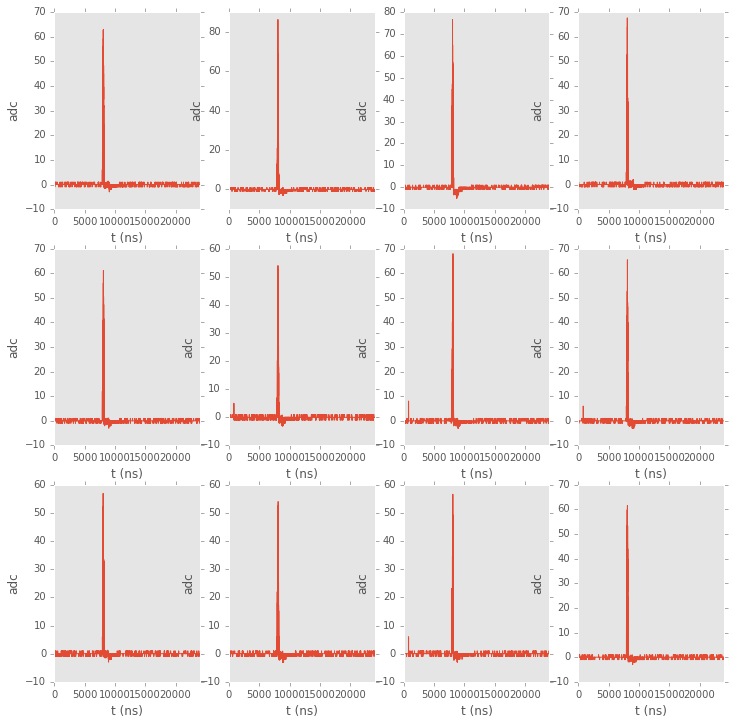

Press a key...


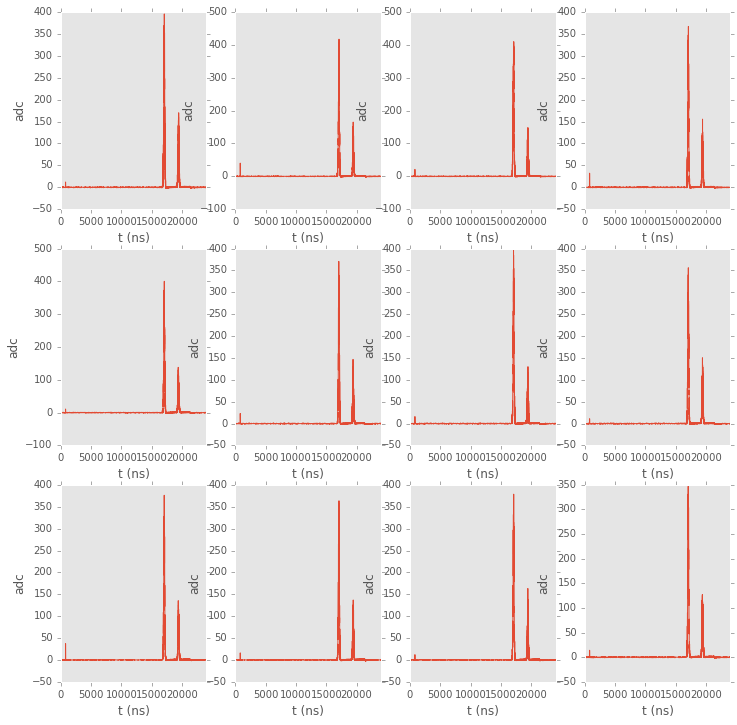

Press a key...


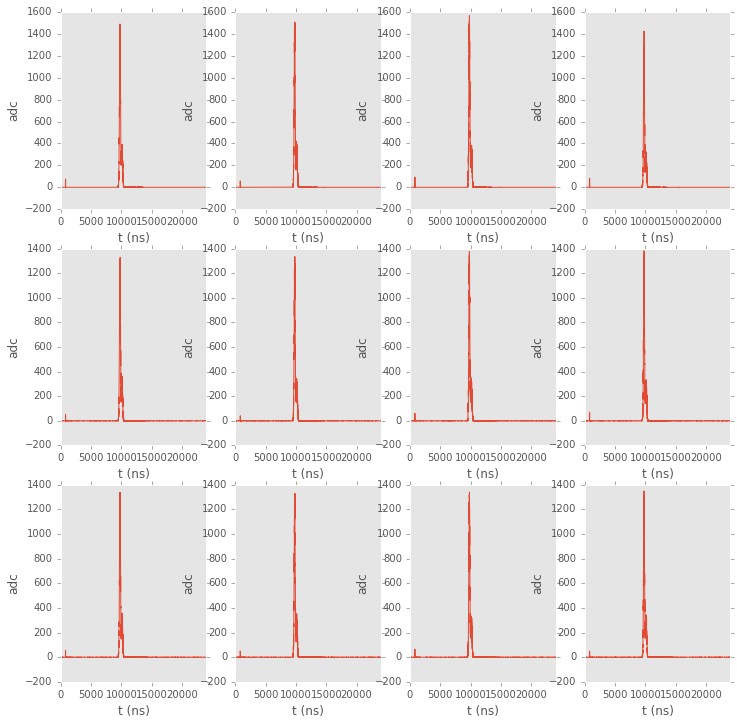

Press a key...


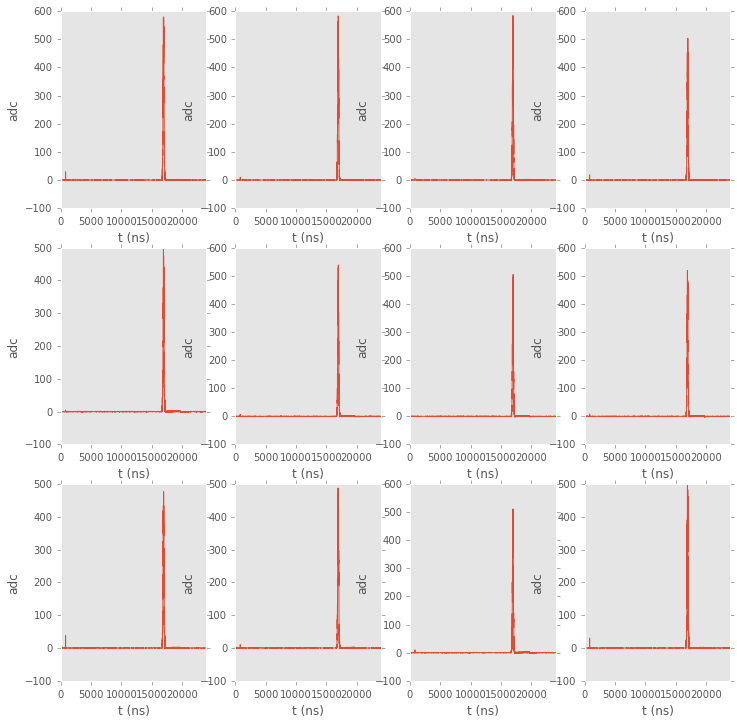

Press a key...


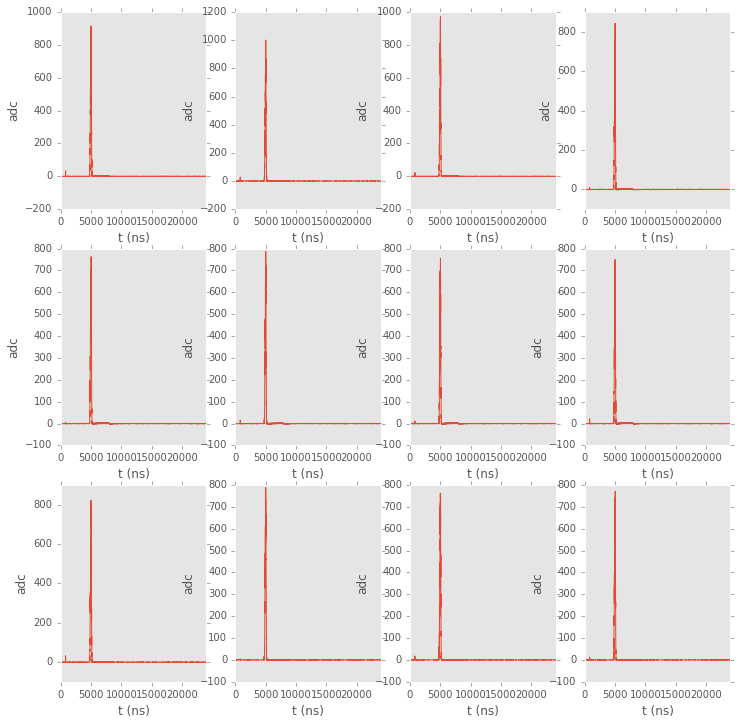

Press a key...


In [134]:
scan_waveforms(pmtcwf,list_of_events=range(10))

In [105]:
cwfdf = get_waveforms(pmtcwf,event_number=5)

In [ ]:
NPMT = pmtcwf.shape[1]

In [ ]:
NPMT

### Add waveforms (calibrated)

#### add_cwf adds the waveform of each PMT in PES (divide by calibration constant) and returns a data frame

In [26]:
def add_cwf(cwfdf,pmtDF):
    """
    input: cwfdf: each colum is the wf for one PMT.
    output: swf is a data frame with two columns:
    time_ns = counts the time in ns
    ene_pes = conths the energy in pes
    """
    wf =0
    NPMT = len(pmtDF)
    for i in range(NPMT):
        adc_to_pes = pmtDF['adc_to_pes'][i]
        wf += cwfdf[i].values/adc_to_pes
    
    swf = {}
    swf['time_ns'] = np.array(range(len(wf)))*FP.time_DAQ  # time in ns
    swf['ene_pes'] = wf 
    return pd.DataFrame(swf)

In [106]:
swf = add_cwf(cwfdf,PMT)

In [28]:
type(swf)

pandas.core.frame.DataFrame

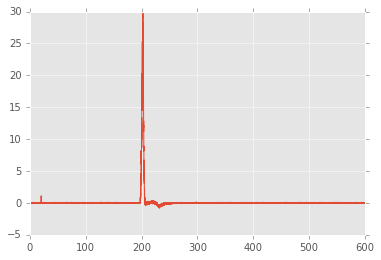

In [107]:
plt.plot(swf['time_ns']/mus, swf['ene_pes'])

In [124]:
def scan_SWF(pmtcwf,pmtDF,list_of_events=[0]):
    for event in list_of_events:
        cwfdf = get_waveforms(pmtcwf,event_number=event)
        swf = add_cwf(cwfdf,pmtDF)
        plt.plot(swf['time_ns']/mus, swf['ene_pes'])
        plt.show()
        wait()
  

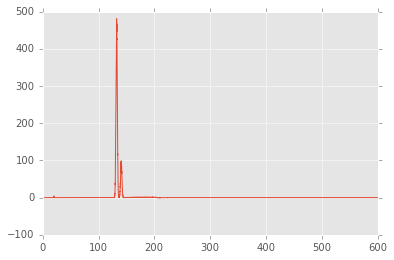

Press a key...


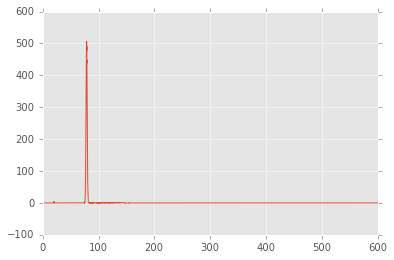

Press a key...


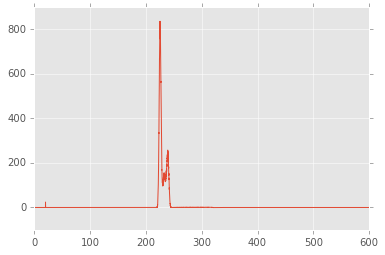

Press a key...


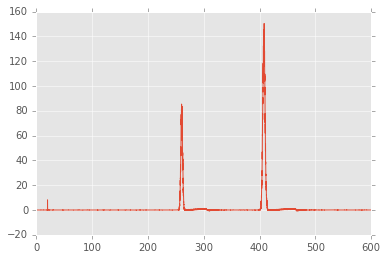

Press a key...


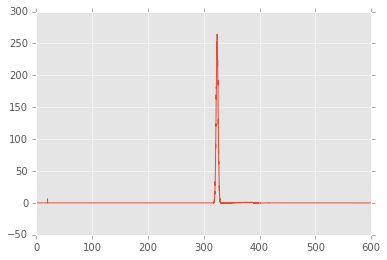

Press a key...


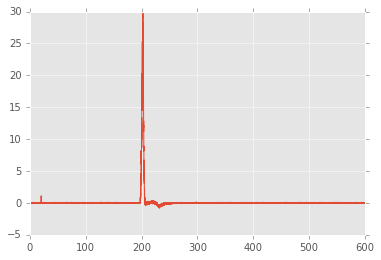

Press a key...


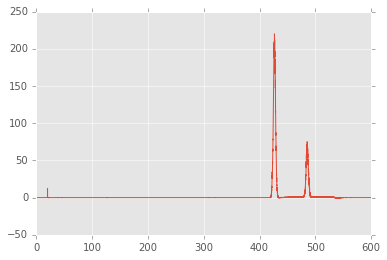

Press a key...


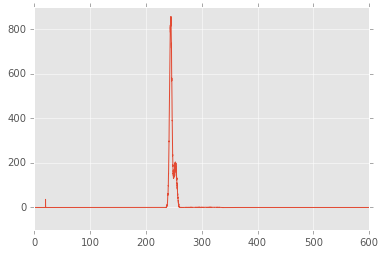

Press a key...


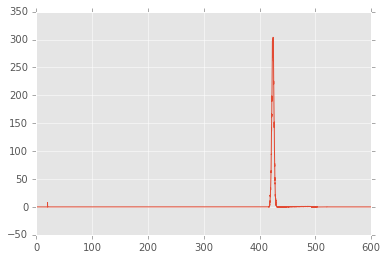

Press a key...


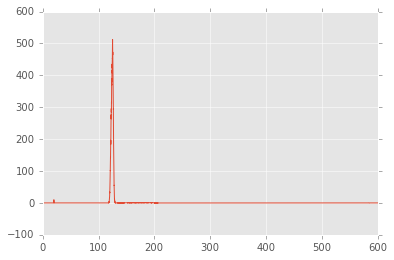

Press a key...


In [125]:
 scan_SWF(pmtcwf,PMT,list_of_events=range(10))

### Rebinning waveforms

In [30]:
def rebin_array(a, stride = 1):
    """
    rebins the array according to stride 
    """
    lenb = len(a)/int(stride)
    b = np.zeros(lenb)
    j=0
    for i in range(lenb):
        b[i] = np.sum(a[j:j+stride])
        j+= stride
    return b

In [34]:
def rebin_waveform(swf, stride = 1):
    """
    rebins the a waveform according to stride 
    The input waveform is a vector such that the index expresses time bin and the
    contents expresses energy (e.g, in pes)
    The function returns a DataFrame. The time bins and energy are rebinned according to stride
    """
    
    rbw={}
    rbw['ene_pes'] = rebin_array(swf['ene_pes'].values,stride)
    rbw['time_mus'] = SGN.decimate(swf['time_ns'].values,stride,ftype='fir')/mus
    return pd.DataFrame(rbw)
    

In [108]:
rbwf = rebin_waveform(swf, stride = 40)

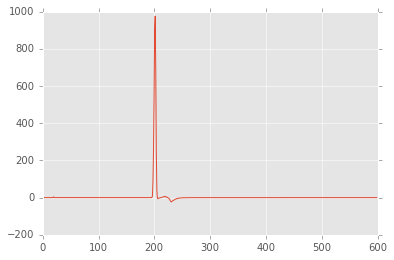

In [109]:
plt.plot(rbwf['time_mus'], rbwf['ene_pes'])

### Finding S1 and S2 signals

In [37]:
def wf_thr(wf,threshold=1):
    """
    return a zero supressed waveform (more generally, the vaules of wf above threshold)
    """
    return wf.loc[lambda df: df.ene_pes.values >threshold, :]
    

In [118]:
NPMT = len(PMT)
adc_to_pes = PMT['adc_to_pes'][0]
nsigma=5
thr = nsigma*sqrt(NPMT)*FP.NOISE_ADC/adc_to_pes

In [119]:
thr

1.7176729646726219

In [120]:
rbwf_zs = wf_thr(rbwf,threshold=thr) 

In [121]:
rbwf_zs

,ene_pes,time_mus
20,4.344088,19.625
197,8.850514,196.625
198,86.010819,197.625
199,264.694320,198.625
200,538.638503,199.625
201,901.802740,200.625
202,975.095944,201.625
203,674.047279,202.625
204,235.856137,203.625
205,37.311630,204.625


In [95]:
def find_S12(swf, stride=5):
    T = swf['time_mus'].values
    P = swf['ene_pes'].values
    indx = swf.index
    
    S12 = {}
    pulse_on = 1
    j=0
    
    S12[0] = []
    S12[0].append([T[0],P[0]])
    
    for i in range(1,len(T)) :
        if T[i]-stride > T[i-1]:  #new s12
            j+=1
            S12[j] = []
            S12[j].append([T[i],P[i]])
        else:
            S12[j].append([T[i],P[i]])
            
    S12L=[]
    for i in S12.keys():
        S12L.append(pd.DataFrame(S12[i], columns=['time_mus','ene_pes']))
    return S12L
            

In [116]:
s12 = find_S12(rbwf_zs)

In [117]:
len(s12)

1

In [98]:
s12

[   time_mus    ene_pes
 0    19.625  113.80316,     time_mus       ene_pes
 0    218.625     27.030017
 1    219.625    211.368413
 2    220.625   1626.800226
 3    221.625   6313.820239
 4    222.625  16453.049743
 5    223.625  27737.637574
 6    224.625  32159.724485
 7    225.625  26280.484208
 8    226.625  15907.946468
 9    227.625   7974.823519
 10   228.625   4547.675582
 11   229.625   4384.476468
 12   230.625   5241.776533
 13   231.625   5882.857039
 14   232.625   5577.805363
 15   233.625   5035.843660
 16   234.625   5091.062129
 17   235.625   6244.473662
 18   236.625   7636.285569
 19   237.625   9210.830677
 20   238.625   9421.109264
 21   239.625   7405.045421
 22   240.625   4719.612450
 23   241.625   2117.380280
 24   242.625    627.390958
 25   243.625    112.436229
 26   244.625     21.466879
 27   246.625      2.964625
 28   247.625      4.032670
 29   248.625      3.900751
 ..       ...           ...
 70   289.625     25.187329
 71   290.625     25.399561


In [99]:
s2=s12[1]

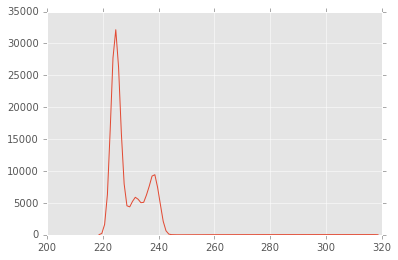

In [100]:
plt.plot(s2['time_mus'], s2['ene_pes'])

In [101]:
def S12(pmtcwf,pmtDF,list_of_events=[0], stride=40, nsigma = 5):
    """
    Takes the earray pmtea and a list of events and returns a list of s12 objects.
    1) adds the waveforms (calibrated)
    2) rebins to 1 mus
    3) Supresses zeros
    4) finds s1 and s2 objects
    """
    NPMT = len(pmtDF)
    adc_to_pes = pmtDF['adc_to_pes'][0]
    thr = nsigma*sqrt(NPMT)*FP.NOISE_ADC/adc_to_pes
    
    S12 =[]
    for event in list_of_events:
        cwfdf = get_waveforms(pmtcwf,event_number=event)
        swf = add_cwf(cwfdf,pmtDF)
        rbwf = rebin_waveform(swf, stride = stride)
        rbwf_zs = wf_thr(rbwf,threshold =thr)
        s12 = find_S12(rbwf_zs)
        S12.append(s12)
    return S12
        
        

### Adding waveforms, rebinning and finding S1 and S2

In [102]:
def scan_S12(S12):
    """
    Plots S1 and S2 for each S12
    """
    for s12 in S12:
        s1 = s12[0] #s1 is a series
        print("number of s12 signals = {}".format(len(s12)))
        print(s1)
        
        for s2 in s12[1:]:
            plt.plot(s2['time_mus'],s2['ene_pes'])
        plt.show()
        wait()

In [103]:
s12 = S12(pmtcwf,PMT,list_of_events=range(10), stride=40,nsigma = 5)

number of s12 signals = 2
   time_mus    ene_pes
0    19.625  20.995488


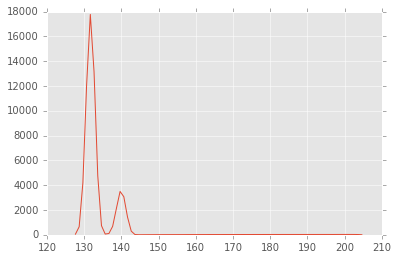

Press a key...
number of s12 signals = 2
   time_mus  ene_pes
0    19.625  18.6856


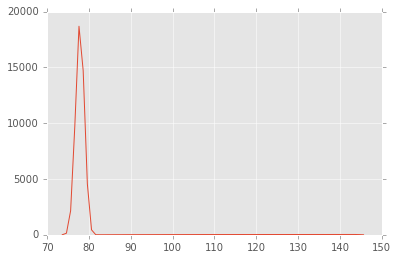

Press a key...
number of s12 signals = 2
   time_mus    ene_pes
0    19.625  113.80316


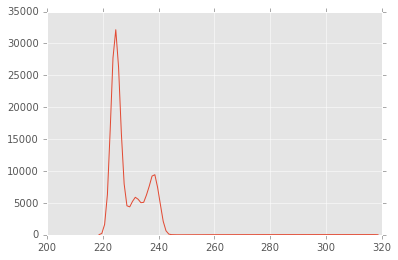

Press a key...
number of s12 signals = 4
   time_mus    ene_pes
0    19.625  38.805038


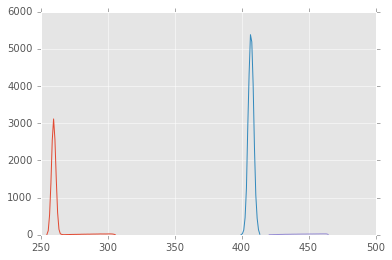

Press a key...
number of s12 signals = 2
   time_mus    ene_pes
0    19.625  28.482093


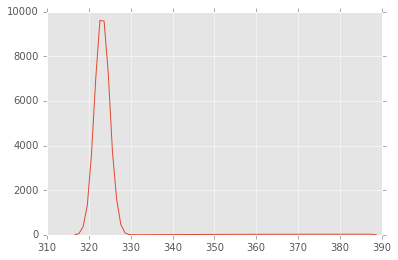

Press a key...
number of s12 signals = 3
   time_mus   ene_pes
0    19.625  4.344088


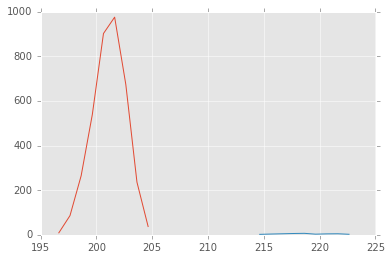

KeyboardInterrupt: 

In [104]:
scan_S12(s12)